# Lead Case Study 
During this case study we will try to find out those variables or factor which will 
help the sales team to do better sales. 

    Step 1. Importing the Leads Data into the Notebook 

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [3]:
# Importing all datasets
leads_data = pd.read_csv("Leads.csv")
leads_data.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [4]:
# Let's check the dimensions of the dataframe
leads_data.shape

(9240, 37)

In [5]:
# Let's see the type of each column
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

Data Preparation

In [6]:
#Removing the some of the coulumns who have the same value accross the rows, this will not impact our model.
leads_data=leads_data.drop(['What matters most to you in choosing a course','City','Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'], axis=1)
leads_data.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email  Converted  TotalVisits  \
0      Olark Chat           No          0          0.0   
1  Organic Search           No          0          5.0   
2  Direct Traffic           No          1          2.0   
3  Direct Traffic           No          0          1.0   
4          Google           No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

   ... What is your current occupation                                 Tags  \
0  ...                      Unemployed          Interested in other courses   
1  ...                      Unemployed                              Ringing   
2  ...                         Student  Will revert after reading the email   
3  ...                      Unemployed                              Ringing   
4  ...                      Unemployed  Will revert after reading the email   

       Lead Quality    Lead Profile Asymmetrique Activity Index  \
0  Low in Relevance          Select                   02.Medium   
1               NaN          Select                   02.Medium   
2          Might be  Potential Lead                   02.Medium   
3          Not Sure          Select                   02.Medium   
4          Might be          Select                   02.Medium   

  Asymmetrique Profile Index Asymmetrique Activity Score  \
0                  02.Medium                        15.0   
1                  02.Medium                        15.0   
2                    01.High                        14.0   
3                    01.High                        13.0   
4                    01.High                        15.0   

  Asymmetrique Profile Score A free copy of Mastering The Interview  \
0                       15.0                                     No   
1                       15.0                                     No   
2                       20.0                                    Yes   
3                       17.0                                     No   
4                       18.0                                     No   

   Last Notable Activity  
0               Modified  
1           Email Opened  
2           Email Opened  
3               Modified  
4               Modified  

[5 rows x 23 columns]

In [7]:
#12 Columns have been deleted as they have the same data across all the rows. 
leads_data.shape

(9240, 23)

In [8]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Number                             9240 non-null   int64  
 2   Lead Origin                             9240 non-null   object 
 3   Lead Source                             9204 non-null   object 
 4   Do Not Email                            9240 non-null   object 
 5   Converted                               9240 non-null   int64  
 6   TotalVisits                             9103 non-null   float64
 7   Total Time Spent on Website             9240 non-null   int64  
 8   Page Views Per Visit                    9103 non-null   float64
 9   Last Activity                           9137 non-null   object 
 10  Country                                 6779 non-null   obje

In [9]:
# List of variables to map

varlist =  ['Do Not Email', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads_data[varlist] = leads_data[varlist].apply(binary_map)

In [10]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Number                             9240 non-null   int64  
 2   Lead Origin                             9240 non-null   object 
 3   Lead Source                             9204 non-null   object 
 4   Do Not Email                            9240 non-null   int64  
 5   Converted                               9240 non-null   int64  
 6   TotalVisits                             9103 non-null   float64
 7   Total Time Spent on Website             9240 non-null   int64  
 8   Page Views Per Visit                    9103 non-null   float64
 9   Last Activity                           9137 non-null   object 
 10  Country                                 6779 non-null   obje

In [11]:
#Dropping the prospect ID as we have another unique indentified as lead number
leads_data=leads_data.drop(['Prospect ID'], axis=1)
leads_data.head()

Lead Number              Lead Origin     Lead Source  Do Not Email  \
0       660737                      API      Olark Chat             0   
1       660728                      API  Organic Search             0   
2       660727  Landing Page Submission  Direct Traffic             0   
3       660719  Landing Page Submission  Direct Traffic             0   
4       660681  Landing Page Submission          Google             0   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity Country  ... What is your current occupation  \
0  Page Visited on Website     NaN  ...                      Unemployed   
1             Email Opened   India  ...                      Unemployed   
2             Email Opened   India  ...                         Student   
3              Unreachable   India  ...                      Unemployed   
4        Converted to Lead   India  ...                      Unemployed   

                                  Tags      Lead Quality    Lead Profile  \
0          Interested in other courses  Low in Relevance          Select   
1                              Ringing               NaN          Select   
2  Will revert after reading the email          Might be  Potential Lead   
3                              Ringing          Not Sure          Select   
4  Will revert after reading the email          Might be          Select   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

   A free copy of Mastering The Interview  Last Notable Activity  
0                                       0               Modified  
1                                       0           Email Opened  
2                                       1           Email Opened  
3                                       0               Modified  
4                                       0               Modified  

[5 rows x 22 columns]

In [12]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(leads_data[['Lead Origin', 'Lead Source', 'Lead Quality', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index']], drop_first=True)

# Adding the results to the master dataframe
leads_data = pd.concat([leads_data, dummy1], axis=1)

In [13]:
leads_data.head()

Lead Number              Lead Origin     Lead Source  Do Not Email  \
0       660737                      API      Olark Chat             0   
1       660728                      API  Organic Search             0   
2       660727  Landing Page Submission  Direct Traffic             0   
3       660719  Landing Page Submission  Direct Traffic             0   
4       660681  Landing Page Submission          Google             0   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity Country  ... Lead Source_welearnblog_Home  \
0  Page Visited on Website     NaN  ...                        False   
1             Email Opened   India  ...                        False   
2             Email Opened   India  ...                        False   
3              Unreachable   India  ...                        False   
4        Converted to Lead   India  ...                        False   

  Lead Source_youtubechannel Lead Quality_Low in Relevance  \
0                      False                          True   
1                      False                         False   
2                      False                         False   
3                      False                         False   
4                      False                         False   

  Lead Quality_Might be Lead Quality_Not Sure Lead Quality_Worst  \
0                 False                 False              False   
1                 False                 False              False   
2                  True                 False              False   
3                 False                  True              False   
4                  True                 False              False   

  Asymmetrique Activity Index_02.Medium Asymmetrique Activity Index_03.Low  \
0                                  True                              False   
1                                  True                              False   
2                                  True                              False   
3                                  True                              False   
4                                  True                              False   

   Asymmetrique Profile Index_02.Medium  Asymmetrique Profile Index_03.Low  
0                                  True                              False  
1                                  True                              False  
2                                 False                              False  
3                                 False                              False  
4                                 False                              False  

[5 rows x 54 columns]

In [14]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.

# Creating dummy variables for the variable 'Last Activity'
la = pd.get_dummies(leads_data['Last Activity'], prefix='Last Activity')
# Dropping Last Activity_Page_Visited_on_Website column
la1 = la.drop(['Last Activity_Page Visited on Website'], axis=1)
#Adding the results to the master dataframe
leads_data = pd.concat([leads_data,la1], axis=1)

# Creating dummy variables for the variable 'Specialization'
sd = pd.get_dummies(leads_data['Specialization'], prefix='Specialization')
# Dropping Last Specialization_Banking, Investment And Insurance column
sd1 = sd.drop(['Specialization_Banking, Investment And Insurance'], axis=1)
#Adding the results to the master dataframe
leads_data = pd.concat([leads_data,sd1], axis=1)


# Creating dummy variables for the variable 'How did you hear about X Education'
hd = pd.get_dummies(leads_data['How did you hear about X Education'], prefix='How did you hear about X Education')
# Dropping Last How did you hear about X Education_Student of SomeSchool column
hd1 = hd.drop(['How did you hear about X Education_Student of SomeSchool'], axis=1)
#Adding the results to the master dataframe
leads_data = pd.concat([leads_data,hd1], axis=1)

# Creating dummy variables for the variable 'What is your current occupation'
od = pd.get_dummies(leads_data['What is your current occupation'], prefix='What is your current occupation')
# Dropping Last What is your current occupation_Working Professional column
od1 = od.drop(['What is your current occupation_Working Professional'], axis=1)
#Adding the results to the master dataframe
leads_data = pd.concat([leads_data,od1], axis=1)


# Creating dummy variables for the variable 'Tags'
td = pd.get_dummies(leads_data['Tags'], prefix='Tags')
# Dropping Tags_In confusion whether part time or DLP column
td1 = td.drop(['Tags_In confusion whether part time or DLP'], axis=1)
#Adding the results to the master dataframe
leads_data = pd.concat([leads_data,td1], axis=1)


# Creating dummy variables for the variable 'Lead Profile'. 
lp = pd.get_dummies(leads_data['Lead Profile'], prefix='Lead Profile')
lp1 = lp.drop(['Lead Profile_Dual Specialization Student'], axis=1)
# Adding the results to the master dataframe
leads_data = pd.concat([leads_data,lp1], axis=1)

# Creating dummy variables for the variable 'Last Notable Activity'
ln = pd.get_dummies(leads_data['Last Notable Activity'], prefix='Last Notable Activity')
# Dropping Last Last Notable Activity_Email Link Clicked column
ln1 = ln.drop(['Last Notable Activity_Email Link Clicked'], axis=1)
#Adding the results to the master dataframe
leads_data = pd.concat([leads_data,ln1], axis=1)




In [15]:
leads_data.head()

Lead Number              Lead Origin     Lead Source  Do Not Email  \
0       660737                      API      Olark Chat             0   
1       660728                      API  Organic Search             0   
2       660727  Landing Page Submission  Direct Traffic             0   
3       660719  Landing Page Submission  Direct Traffic             0   
4       660681  Landing Page Submission          Google             0   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity Country  ...  \
0  Page Visited on Website     NaN  ...   
1             Email Opened   India  ...   
2             Email Opened   India  ...   
3              Unreachable   India  ...   
4        Converted to Lead   India  ...   

  Last Notable Activity_Form Submitted on Website  \
0                                           False   
1                                           False   
2                                           False   
3                                           False   
4                                           False   

  Last Notable Activity_Had a Phone Conversation  \
0                                          False   
1                                          False   
2                                          False   
3                                          False   
4                                          False   

  Last Notable Activity_Modified  \
0                           True   
1                          False   
2                          False   
3                           True   
4                           True   

  Last Notable Activity_Olark Chat Conversation  \
0                                         False   
1                                         False   
2                                         False   
3                                         False   
4                                         False   

  Last Notable Activity_Page Visited on Website  \
0                                         False   
1                                         False   
2                                         False   
3                                         False   
4                                         False   

  Last Notable Activity_Resubscribed to emails Last Notable Activity_SMS Sent  \
0                                        False                          False   
1                                        False                          False   
2                                        False                          False   
3                                        False                          False   
4                                        False                          False   

  Last Notable Activity_Unreachable  Last Notable Activity_Unsubscribed  \
0                             False                               False   
1                             False                               False   
2                             False                               False   
3                             False                               False   
4                             False                               False   

   Last Notable Activity_View in browser link Clicked  
0                                              False   
1                                              False   
2                                              False   
3                                              False   
4                                              False   

[5 rows x 147 columns]

In [16]:
# We have created dummies for the below variables, so we can drop them
leads_data = leads_data.drop(['Lead Origin', 'Lead Source', 'Lead Quality', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Last Activity', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What is your current occupation', 'Tags', 'Lead Profile', 'Last Notable Activity', 'Country'], axis=1)

In [17]:
#The varaible was imported as a string we need to convert it to float
leads_data['Page Views Per Visit'] = pd.to_numeric(leads_data['Page Views Per Visit'])

In [18]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Columns: 134 entries, Lead Number to Last Notable Activity_View in browser link Clicked
dtypes: bool(125), float64(4), int64(5)
memory usage: 1.7 MB


# Now you can see that you have all variables as numeric.

Now you can see that you have all variables as numeric.

# Checking for Outliers

In [19]:
# Checking for outliers in the continuous variables
num_leads_data = leads_data[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Asymmetrique Activity Score','Asymmetrique Profile Score']]

In [20]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_leads_data.describe(percentiles=[.25, .5, .75, .90, .95, .99])

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
count  9103.000000                  9240.000000           9103.000000   
mean      3.445238                   487.698268              2.362820   
std       4.854853                   548.021466              2.161418   
min       0.000000                     0.000000              0.000000   
25%       1.000000                    12.000000              1.000000   
50%       3.000000                   248.000000              2.000000   
75%       5.000000                   936.000000              3.000000   
90%       7.000000                  1380.000000              5.000000   
95%      10.000000                  1562.000000              6.000000   
99%      17.000000                  1840.610000              9.000000   
max     251.000000                  2272.000000             55.000000   

       Asymmetrique Activity Score  Asymmetrique Profile Score  
count                  5022.000000                 5022.000000  
mean                     14.306252                   16.344883  
std                       1.386694                    1.811395  
min                       7.000000                   11.000000  
25%                      14.000000                   15.000000  
50%                      14.000000                   16.000000  
75%                      15.000000                   18.000000  
90%                      16.000000                   19.000000  
95%                      17.000000                   20.000000  
99%                      17.000000                   20.000000  
max                      18.000000                   20.000000

In [21]:
# Adding up the missing values (column-wise)
leads_data.isnull().sum()

Lead Number                                             0
Do Not Email                                            0
Converted                                               0
TotalVisits                                           137
Total Time Spent on Website                             0
                                                     ... 
Last Notable Activity_Resubscribed to emails            0
Last Notable Activity_SMS Sent                          0
Last Notable Activity_Unreachable                       0
Last Notable Activity_Unsubscribed                      0
Last Notable Activity_View in browser link Clicked      0
Length: 134, dtype: int64

In [22]:
# Checking the percentage of missing values
round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Lead Number                                           0.00
Do Not Email                                          0.00
Converted                                             0.00
TotalVisits                                           1.48
Total Time Spent on Website                           0.00
                                                      ... 
Last Notable Activity_Resubscribed to emails          0.00
Last Notable Activity_SMS Sent                        0.00
Last Notable Activity_Unreachable                     0.00
Last Notable Activity_Unsubscribed                    0.00
Last Notable Activity_View in browser link Clicked    0.00
Length: 134, dtype: float64

In [23]:
# Removing NaN TotalCharges rows
leads_data = leads_data[~np.isnan(leads_data['TotalVisits'])]

In [24]:
# Checking percentage of missing values after removing the missing values
round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Lead Number                                           0.0
Do Not Email                                          0.0
Converted                                             0.0
TotalVisits                                           0.0
Total Time Spent on Website                           0.0
                                                     ... 
Last Notable Activity_Resubscribed to emails          0.0
Last Notable Activity_SMS Sent                        0.0
Last Notable Activity_Unreachable                     0.0
Last Notable Activity_Unsubscribed                    0.0
Last Notable Activity_View in browser link Clicked    0.0
Length: 134, dtype: float64

In [25]:
leads_data = leads_data.dropna()

# test_train split

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
# Putting feature variable to X
X = leads_data.drop(['Converted','Lead Number'], axis=1)
X.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
0             0          0.0                            0   
1             0          5.0                          674   
2             0          2.0                         1532   
3             0          1.0                          305   
4             0          2.0                         1428   

   Page Views Per Visit  Asymmetrique Activity Score  \
0                   0.0                         15.0   
1                   2.5                         15.0   
2                   2.0                         14.0   
3                   1.0                         13.0   
4                   1.0                         15.0   

   Asymmetrique Profile Score  A free copy of Mastering The Interview  \
0                        15.0                                       0   
1                        15.0                                       0   
2                        20.0                                       1   
3                        17.0                                       0   
4                        18.0                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                False                      False   
1                                False                      False   
2                                 True                      False   
3                                 True                      False   
4                                 True                      False   

   Lead Origin_Lead Import  ...  \
0                    False  ...   
1                    False  ...   
2                    False  ...   
3                    False  ...   
4                    False  ...   

   Last Notable Activity_Form Submitted on Website  \
0                                            False   
1                                            False   
2                                            False   
3                                            False   
4                                            False   

   Last Notable Activity_Had a Phone Conversation  \
0                                           False   
1                                           False   
2                                           False   
3                                           False   
4                                           False   

   Last Notable Activity_Modified  \
0                            True   
1                           False   
2                           False   
3                            True   
4                            True   

   Last Notable Activity_Olark Chat Conversation  \
0                                          False   
1                                          False   
2                                          False   
3                                          False   
4                                          False   

   Last Notable Activity_Page Visited on Website  \
0                                          False   
1                                          False   
2                                          False   
3                                          False   
4                                          False   

   Last Notable Activity_Resubscribed to emails  \
0                                         False   
1                                         False   
2                                         False   
3                                         False   
4                                         False   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                           False                              False   
1                           False                              False   
2                           False                              False   
3                           False                              False   
4                           False                              False   

 

In [28]:
# Putting response variable to y
y = leads_data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [29]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Feature Scaling

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()

    X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
7873             0    -0.794006                    -0.886051   
1980             0    -0.348723                    -0.417960   
8208             0    -0.348723                     1.064328   
7486             0     1.655050                     1.017156   
2147             0     0.764484                     1.184072   

      Page Views Per Visit  Asymmetrique Activity Score  \
7873             -1.039509                         17.0   
1980             -0.603966                         14.0   
8208             -0.168422                         15.0   
7486             -0.081313                         14.0   
2147             -0.277308                         15.0   

      Asymmetrique Profile Score  A free copy of Mastering The Interview  \
7873                        15.0                                       0   
1980                        15.0                                       0   
8208                        15.0                                       0   
7486                        17.0                                       0   
2147                        15.0                                       0   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
7873                                False                      False   
1980                                False                      False   
8208                                False                      False   
7486                                 True                      False   
2147                                False                      False   

      Lead Origin_Lead Import  ...  \
7873                    False  ...   
1980                    False  ...   
8208                    False  ...   
7486                    False  ...   
2147                    False  ...   

      Last Notable Activity_Form Submitted on Website  \
7873                                            False   
1980                                            False   
8208                                            False   
7486                                            False   
2147                                            False   

      Last Notable Activity_Had a Phone Conversation  \
7873                                           False   
1980                                           False   
8208                                           False   
7486                                           False   
2147                                           False   

      Last Notable Activity_Modified  \
7873                            True   
1980                           False   
8208                           False   
7486                           False   
2147                           False   

      Last Notable Activity_Olark Chat Conversation  \
7873                                          False   
1980                                          False   
8208                                          False   
7486                                          False   
2147                                           True   

      Last Notable Activity_Page Visited on Website  \
7873                                          False   
1980                                          False   
8208                                          False   
7486                                          False   
2147                                          False   

      Last Notable Activity_Resubscribed to emails  \
7873                                         False   
1980                                         False   
8208                                         False   
7486                                         False   
2147                                         False   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
7873                           False                              False   
1980                           False                              False   
8208          

In [32]:
### Checking the Churn Rate
converted = (sum(leads_data['Converted'])/len(leads_data['Converted'].index))*100
converted

37.54812563323202

Step 6: Looking at Correlations

In [33]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [34]:
leads_data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Index: 4935 entries, 0 to 9239
Data columns (total 134 columns):
 #    Column                                                  Dtype  
---   ------                                                  -----  
 0    Lead Number                                             int64  
 1    Do Not Email                                            int64  
 2    Converted                                               int64  
 3    TotalVisits                                             float64
 4    Total Time Spent on Website                             int64  
 5    Page Views Per Visit                                    float64
 6    Asymmetrique Activity Score                             float64
 7    Asymmetrique Profile Score                              float64
 8    A free copy of Mastering The Interview                  int64  
 9    Lead Origin_Landing Page Submission                     bool   
 10   Lead Origin_Lead Add Form                          

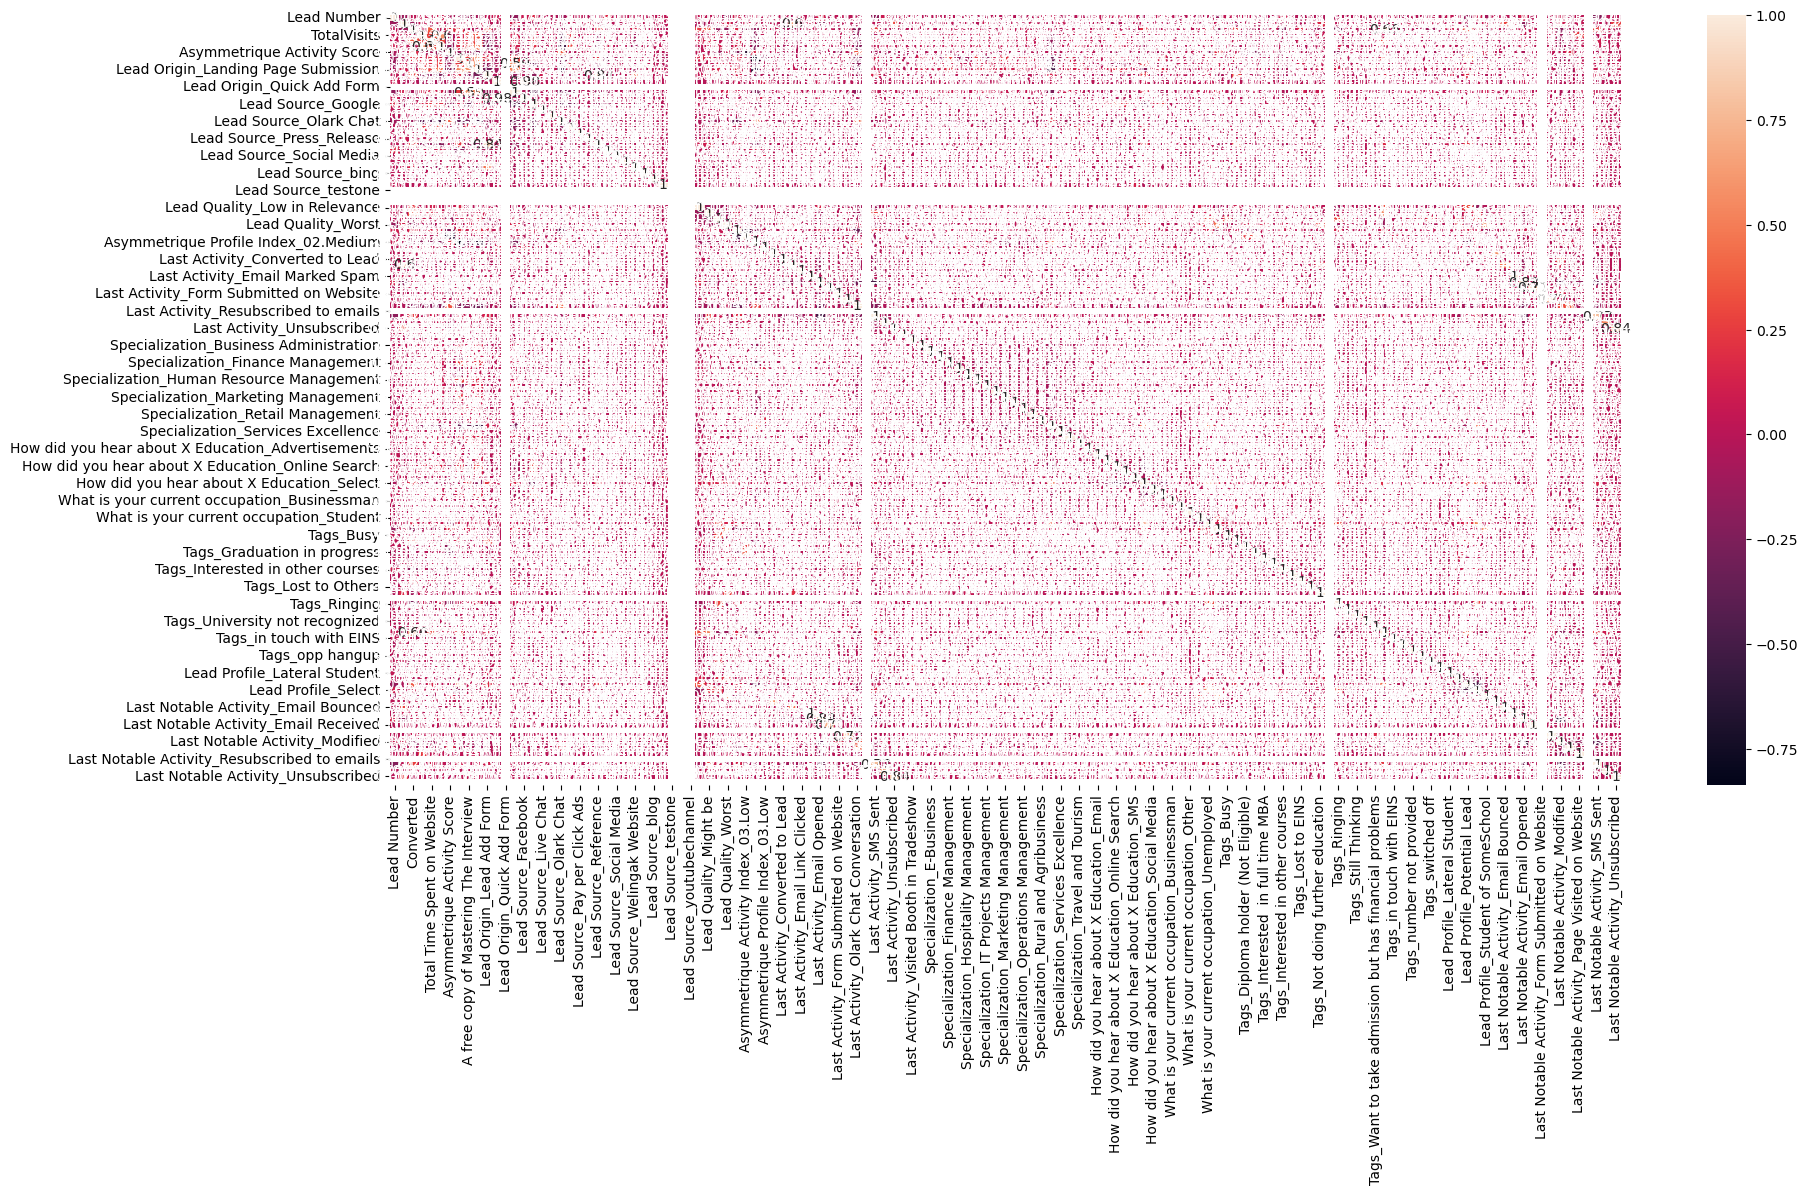

In [35]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(leads_data.corr(),annot = True)
plt.show()

In [36]:
X_test = X_test.drop(['Asymmetrique Activity Score', 'Lead Origin_Landing Page Submission', 'Lead Origin_Quick Add Form', 'Lead Source_Press_Release', 'Lead Quality_Might be', 'Lead Quality_Worst', 'Asymmetrique Activity Index_03.Low', 'Last Activity_SMS Sent', 'Last Activity_Unsubscribed', 'Last Activity_Form Submitted on Website', 'What is your current occupation_Unemployed', 'Tags_Already a student', 'Tags_Busy', 'Last Activity_Email Opened', 'Last Activity_Email Link Clicked', 'Last Activity_Form Submitted on Website'], axis=1)
X_train = X_train.drop(['Asymmetrique Activity Score', 'Lead Origin_Landing Page Submission', 'Lead Origin_Quick Add Form', 'Lead Source_Press_Release', 'Lead Quality_Might be', 'Lead Quality_Worst', 'Asymmetrique Activity Index_03.Low', 'Last Activity_SMS Sent', 'Last Activity_Unsubscribed', 'Last Activity_Form Submitted on Website', 'What is your current occupation_Unemployed', 'Tags_Already a student', 'Tags_Busy', 'Last Activity_Email Opened', 'Last Activity_Email Link Clicked', 'Last Activity_Form Submitted on Website'], axis=1)

Checking the Correlation Matrix

#After dropping highly correlated variables now let's check the correlation matrix again.

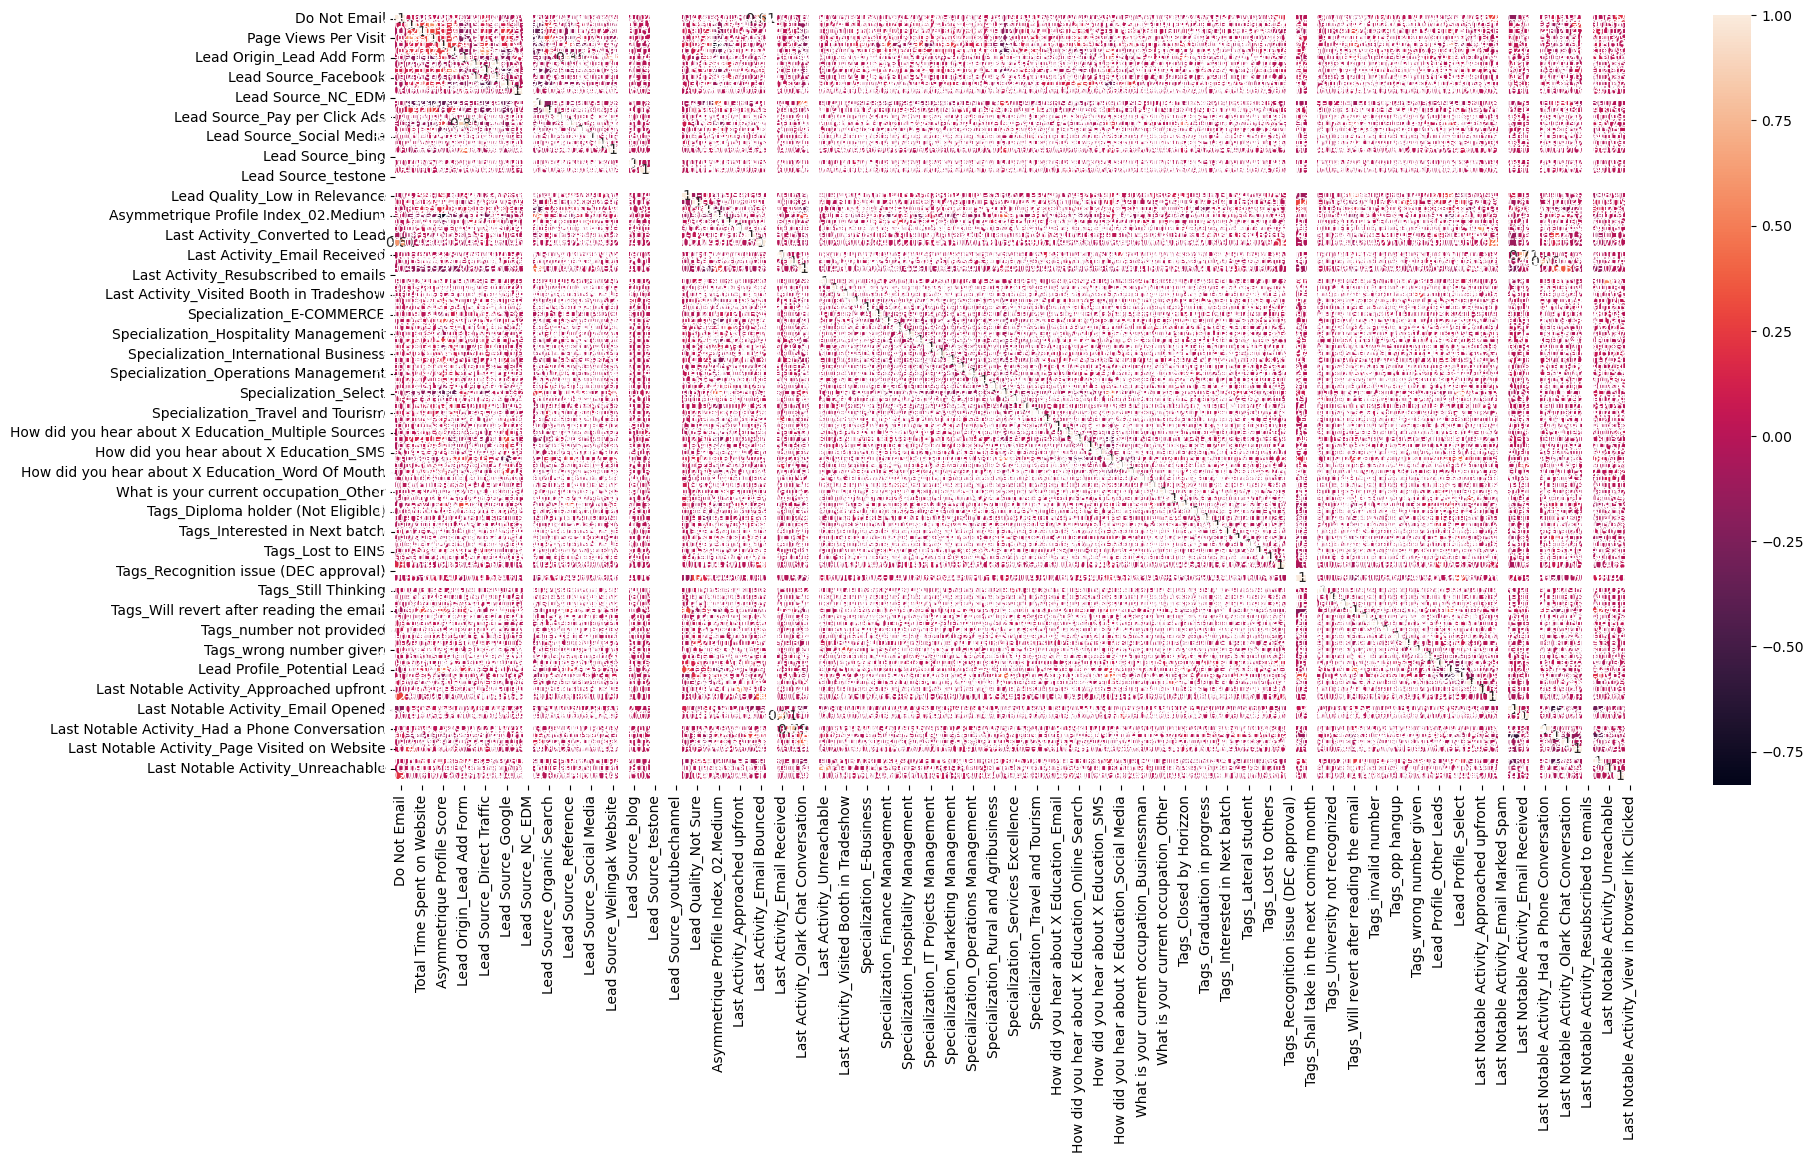

In [37]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

Step 7: Model Building
Let's start by splitting our data into a training set and a test set.

Running Your First Training Model

In [38]:
import statsmodels.api as sm

In [39]:
y_train.info(verbose = True)

<class 'pandas.core.series.Series'>
Index: 3454 entries, 7873 to 8211
Series name: Converted
Non-Null Count  Dtype
--------------  -----
3454 non-null   int64
dtypes: int64(1)
memory usage: 54.0 KB


In [40]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train.astype(float))), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3454
Model:                            GLM   Df Residuals:                     3350
Model Family:                Binomial   Df Model:                          103
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -617.63
Date:                Wed, 21 Feb 2024   Deviance:                       1235.3
Time:                        16:39:35   Pearson chi2:                 6.58e+03
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6212
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                    -25.0665   9.79e+04     -0.000      1.000   -1.92e+05    1.92e+05
Do Not Email                                              -1.1507      0.498     -2.313      0.021      -2.126      -0.176
TotalVisits                                                0.0404      0.091      0.441      0.659      -0.139       0.220
Total Time Spent on Website                                1.0774      0.092     11.670      0.000       0.896       1.258
Page Views Per Visit                                       0.0252      0.100      0.251      0.802      -0.171       0.222
Asymmetrique Profile Score                                 0.0313      0.156      0.200      0.841      -0.275       0.338
A free copy of Mastering The Interview                     0.0179      0.284      0.063      0.950      -0.538       0.574
Lead Origin_Lead Add Form                                 23.5541   9.79e+04      0.000      1.000   -1.92e+05    1.92e+05
Lead Origin_Lead Import                                   10.4529    4.9e+04      0.000      1.000   -9.59e+04     9.6e+04
Lead Source_Direct Traffic                                20.1669   9.79e+04      0.000      1.000   -1.92e+05    1.92e+05
Lead Source_Facebook                                      10.4529    4.9e+04      0.000      1.000   -9.59e+04     9.6e+04
Lead Source_Google                                        20.6146   9.79e+04      0.000      1.000   -1.92e+05    1.92e+05
Lead Source_Live Chat                                     18.5446   1.51e+05      0.000      1.000   -2.97e+05    2.97e+05
Lead Source_NC_EDM                                       5.16e-11   1.46e-05   3.53e-06      1.000   -2.86e-05    2.86e-05
Lead Source_Olark Chat                                    21.7428   9.79e+04      0.000      1.000   -1.92e+05    1.92e+05
Lead Source_Organic Search                                20.5520   9.79e+04      0.000      1.000   -1.92e+05    1.92e+05
Lead Source_Pay per Click Ads                              0.8677   2.37e+05   3.66e-06      1.000   -4.65e+05    4.65e+05
Lead Source_Reference                                     -2.0998      1.417     -1.481      0.139      -4.878       0.678
Lead Source_Referral Sites                                20.3379   9.79e+04      0.000      1.000   -1.92e+05    1.92e+05
Lead Source_Social Media                                  21.7948   9.79e+04      0.000      1.000   -1.92e+05    1.92e+05
Lead Source_WeLearn                                       41.5194   2.37e+05      0.000      1.000   -4.65e+05    4.65e+05
Lead Source_Welingak Website                               0.7385      1.534      0.481      0.630      -2.268       3.745
Lead Sou

Step 8: Feature Selection Using RFE

In [41]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [42]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, step=15)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [43]:
rfe.support_

array([ True, False,  True, False, False, False,  True, False,  True,
       False,  True, False, False,  True,  True, False,  True,  True,
       False, False,  True, False,  True, False, False, False, False,
       False, False,  True, False, False, False,  True,  True, False,
       False,  True,  True, False, False,  True, False,  True, False,
       False, False, False,  True, False, False,  True, False, False,
       False,  True, False,  True, False,  True,  True,  True, False,
        True,  True, False, False, False, False,  True,  True, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True, False, False, False, False,
        True,  True, False, False, False,  True, False, False, False])

In [44]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 3),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 4),
 ('Asymmetrique Profile Score', False, 3),
 ('A free copy of Mastering The Interview', False, 4),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 4),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 3),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', False, 4),
 ('Lead Source_NC_EDM', False, 5),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', False, 4),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 4),
 ('Lead Source_WeLearn', False, 5),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 5),
 ('Lead Source_blog', True, 1),
 ('Lead Source_google', False, 3),
 ('Lead Source_testone', False, 5),
 ('Lead Source_welearnblog_Home', Fal

In [45]:
col = X_train.columns[rfe.support_]

In [46]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Asymmetrique Profile Score',
       'A free copy of Mastering The Interview', 'Lead Origin_Lead Import',
       'Lead Source_Facebook', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Pay per Click Ads', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_google',
       'Lead Source_testone', 'Lead Source_welearnblog_Home',
       'Lead Source_youtubechannel', 'Lead Quality_Low in Relevance',
       'Lead Quality_Not Sure', 'Asymmetrique Profile Index_02.Medium',
       'Asymmetrique Profile Index_03.Low', 'Last Activity_Approached upfront',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Received',
       'Last Activity_Resubscribed to emails', 'Last Activity_Unreachable',
       'Last Activity_Visited Booth in Tradeshow', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Managemen

Assessing the model with StatsModels

In [47]:
X_train_sm = sm.add_constant(X_train[col].astype(float))
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3454
Model:                            GLM   Df Residuals:                     3395
Model Family:                Binomial   Df Model:                           58
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -623.12
Date:                Wed, 21 Feb 2024   Deviance:                       1246.2
Time:                        16:39:36   Pearson chi2:                 6.38e+03
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6200
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -2.7687      0.778     -3.560      0.000      -4.293      -1.244
Do Not Email                                              -1.1541      0.468     -2.467      0.014      -2.071      -0.237
Total Time Spent on Website                                1.0821      0.090     12.080      0.000       0.906       1.258
Lead Origin_Lead Add Form                                  2.6645      1.509      1.765      0.078      -0.294       5.623
Lead Source_Direct Traffic                                -0.7481      0.760     -0.984      0.325      -2.238       0.742
Lead Source_Google                                        -0.2484      0.753     -0.330      0.742      -1.725       1.228
Lead Source_Olark Chat                                     0.8769      0.752      1.166      0.243      -0.597       2.351
Lead Source_Organic Search                                -0.2667      0.772     -0.345      0.730      -1.780       1.247
Lead Source_Reference                                     -2.1569      1.409     -1.530      0.126      -4.919       0.605
Lead Source_Referral Sites                                -0.4841      0.878     -0.551      0.582      -2.206       1.238
Lead Source_Welingak Website                               0.7403      1.531      0.483      0.629      -2.261       3.741
Lead Source_blog                                         -24.4960   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
Asymmetrique Activity Index_02.Medium                      0.8402      0.201      4.184      0.000       0.447       1.234
Last Activity_Converted to Lead                           -0.7917      0.474     -1.669      0.095      -1.721       0.138
Last Activity_Email Bounced                               -1.2194      0.960     -1.271      0.204      -3.100       0.661
Last Activity_Had a Phone Conversation                    -2.5101      1.314     -1.911      0.056      -5.085       0.065
Last Activity_Olark Chat Conversation                     -0.3950      0.287     -1.378      0.168      -0.957       0.167
Last Activity_View in browser link Clicked                 1.9056      2.275      0.838      0.402      -2.553       6.365
Specialization_Business Administration                     0.4881      0.382      1.277      0.202      -0.261       1.237
Specialization_Hospitality Management                     -1.2422      0.698     -1.780      0.075      -2.610       0.125
Specialization_International Business                     -0.4992      0.602     -0.830      0.407      -1.678       0.680
Specialization_Retail Management                          -1.0073      0.852     -1.182      0.237      -2.678       0.663
Speciali

In [48]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7873    0.028220
1980    0.067288
8208    0.260476
7486    0.996273
2147    0.692773
323     0.118128
8136    0.018301
2419    0.003649
2883    0.002407
2350    0.004874
dtype: float64

In [49]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.02822025, 0.06728798, 0.26047597, 0.99627265, 0.69277322,
       0.11812786, 0.0183013 , 0.00364912, 0.00240652, 0.00487393])

Creating a dataframe with the actual churn flag and the predicted probabilities

In [50]:
y_train_pred_final = pd.DataFrame({'Conversion':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

Conversion  Conversion_Prob  Lead Number
0           0         0.028220         7873
1           0         0.067288         1980
2           1         0.260476         8208
3           1         0.996273         7486
4           1         0.692773         2147

Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [51]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Conversion  Conversion_Prob  Lead Number  predicted
0           0         0.028220         7873          0
1           0         0.067288         1980          0
2           1         0.260476         8208          0
3           1         0.996273         7486          1
4           1         0.692773         2147          1

In [52]:
from sklearn import metrics

In [53]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Conversion, y_train_pred_final.predicted )
print(confusion)

[[2068   73]
 [ 130 1183]]


In [54]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Conversion, y_train_pred_final.predicted))

0.9412275622466705


Checking VIFs

In [55]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [56]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = (X_train[col].astype(float)).columns
vif['VIF'] = [variance_inflation_factor(X_train[col].astype(float).values, i) for i in range(X_train[col].astype(float).shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2                           Lead Origin_Lead Add Form  15.59
7                               Lead Source_Reference  11.90
52                                Lead Profile_Select   5.91
11              Asymmetrique Activity Index_02.Medium   5.55
4                                  Lead Source_Google   4.13
9                        Lead Source_Welingak Website   3.95
51                        Lead Profile_Potential Lead   3.70
3                          Lead Source_Direct Traffic   3.39
43           Tags_Will revert after reading the email   3.25
14             Last Activity_Had a Phone Conversation   2.75
55     Last Notable Activity_Had a Phone Conversation   2.73
56                     Last Notable Activity_Modified   2.70
5                              Lead Source_Olark Chat   2.54
21                              Specialization_Select   2.20
6                          Lead Source_Organic Search   2.09
39                                       Tags_Ringing   2.08
13                        Last Activity_Email Bounced   2.01
0                                        Do Not Email   1.84
15              Last Activity_Olark Chat Conversation   1.69
57                     Last Notable Activity_SMS Sent   1.62
50                           Lead Profile_Other Leads   1.60
29                            Tags_Closed by Horizzon   1.58
34                   Tags_Interested in other courses   1.53
1                         Total Time Spent on Website   1.49
26   How did you hear about X Education_Online Search   1.34
54                Last Notable Activity_Email Bounced   1.34
12                    Last Activity_Converted to Lead   1.24
38                   Tags_Not doing further education   1.22
47                                  Tags_switched off   1.20
8                          Lead Source_Referral Sites   1.20
31                        Tags_Graduation in progress   1.18
32                  Tags_Interested  in full time MBA   1.17
27   How did you hear about X Education_Word Of Mouth   1.16
36                                  Tags_Lost to EINS   1.14
53                 Lead Profile_Student of SomeSchool   1.13
17             Specialization_Business Administration   1.12
22             Specialization_Supply Chain Management   1.10
49                       Lead Profile_Lateral Student   1.09
25  How did you hear about X Education_Multiple So...   1.08
23                  Specialization_Travel and Tourism   1.08
44                                Tags_invalid number   1.08
30                 Tags_Diploma holder (Not Eligible)   1.07
19              Specialization_International Business   1.06
46                                    Tags_opp hangup   1.05
48                            Tags_wrong number given   1.05
18              Specialization_Hospitality Management   1.04
45                           Tags_number not provided   1.04
42  Tags_Want to take admission but has financial ...   1.04
24  How did you hear about X Education_Advertisements   1.04
37                                Tags_Lost to Others   1.03
20                   Specialization_Retail Management   1.03
40                                Tags_Still Thinking   1.02
41                     Tags_University not recognized   1.01
16         Last Activity_View in browser link Clicked   1.01
35                               Tags_Lateral student   1.01
33                      Tags_Interested in Next batch   1.01
28        What is your current occupation_Businessman   1.01
10                                   Lead Source_blog   1.01

There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'PhoneService' has the highest VIF. So let's start by dropping that.

In [57]:
col = col.drop('Lead Origin_Lead Add Form',1)
col = col.drop('Lead Source_Reference',1)
col = col.drop('Lead Profile_Select',1)
col = col.drop('Asymmetrique Activity Index_02.Medium',1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Lead Source_blog', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_View in browser link Clicked',
       'Specialization_Business Administration',
       'Specialization_Hospitality Management',
       'Specialization_International Business',
       'Specialization_Retail Management', 'Specialization_Select',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism',
       'How did you hear about X Education_Advertisements',
       'How did you hear about X Education_Multiple Sources',
       'How did you hear about X Education_Online Search',
       'How did you hear 

In [59]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col].astype(float))
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3454
Model:                            GLM   Df Residuals:                     3399
Model Family:                Binomial   Df Model:                           54
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -671.37
Date:                Wed, 21 Feb 2024   Deviance:                       1342.7
Time:                        16:40:15   Pearson chi2:                 7.94e+03
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6092
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -0.8291      0.391     -2.121      0.034      -1.595      -0.063
Do Not Email                                              -1.3941      0.458     -3.043      0.002      -2.292      -0.496
Total Time Spent on Website                                1.1316      0.085     13.276      0.000       0.965       1.299
Lead Source_Direct Traffic                                -1.2677      0.411     -3.088      0.002      -2.072      -0.463
Lead Source_Google                                        -1.0030      0.398     -2.518      0.012      -1.784      -0.222
Lead Source_Olark Chat                                    -0.1354      0.392     -0.345      0.730      -0.904       0.634
Lead Source_Organic Search                                -1.0097      0.427     -2.365      0.018      -1.846      -0.173
Lead Source_Referral Sites                                -1.2974      0.600     -2.163      0.031      -2.473      -0.122
Lead Source_Welingak Website                               2.9216      0.844      3.460      0.001       1.266       4.577
Lead Source_blog                                         -25.8153   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
Last Activity_Converted to Lead                           -0.8739      0.440     -1.988      0.047      -1.736      -0.012
Last Activity_Email Bounced                               -0.8382      1.000     -0.838      0.402      -2.799       1.123
Last Activity_Had a Phone Conversation                    -2.2410      1.367     -1.639      0.101      -4.921       0.439
Last Activity_Olark Chat Conversation                     -0.8348      0.267     -3.129      0.002      -1.358      -0.312
Last Activity_View in browser link Clicked                 1.9878      1.520      1.308      0.191      -0.991       4.967
Specialization_Business Administration                     0.6911      0.350      1.975      0.048       0.005       1.377
Specialization_Hospitality Management                     -0.5631      0.712     -0.790      0.429      -1.959       0.833
Specialization_International Business                     -0.4649      0.639     -0.728      0.467      -1.717       0.787
Specialization_Retail Management                          -0.7183      0.869     -0.827      0.408      -2.421       0.984
Specialization_Select                                      1.4654      0.191      7.680      0.000       1.091       1.839
Specialization_Supply Chain Management                    -0.4158      0.409     -1.016      0.310      -1.218       0.386
Specialization_Travel and Tourism                         -0.3164      0.641     -0.493      0.622      -1.574       0.941
How did 

In [60]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [61]:
y_train_pred[:10]

array([0.04129932, 0.09069798, 0.34651174, 0.99533297, 0.53288754,
       0.12268753, 0.02945015, 0.00219579, 0.00226177, 0.01843471])

In [62]:
y_train_pred_final['Conversion_Prob'] = y_train_pred

In [64]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Conversion  Conversion_Prob  Lead Number  predicted
0           0         0.041299         7873          0
1           0         0.090698         1980          0
2           1         0.346512         8208          0
3           1         0.995333         7486          1
4           1         0.532888         2147          1

In [66]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Conversion, y_train_pred_final.predicted))

0.9296467863346844


So overall the accuracy hasn't dropped much.

# Let's check the VIFs again

In [68]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = (X_train[col].astype(float)).columns
vif['VIF'] = [variance_inflation_factor(X_train[col].astype(float).values, i) for i in range(X_train[col].astype(float).shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
11             Last Activity_Had a Phone Conversation  2.74
51     Last Notable Activity_Had a Phone Conversation  2.73
52                     Last Notable Activity_Modified  2.61
3                                  Lead Source_Google  2.40
40           Tags_Will revert after reading the email  2.16
10                        Last Activity_Email Bounced  2.00
2                          Lead Source_Direct Traffic  1.86
4                              Lead Source_Olark Chat  1.86
0                                        Do Not Email  1.83
48                        Lead Profile_Potential Lead  1.73
18                              Specialization_Select  1.69
12              Last Activity_Olark Chat Conversation  1.61
53                     Last Notable Activity_SMS Sent  1.55
36                                       Tags_Ringing  1.46
5                          Lead Source_Organic Search  1.43
1                         Total Time Spent on Website  1.36
23   How did you hear about X Education_Online Search  1.33
50                Last Notable Activity_Email Bounced  1.33
31                   Tags_Interested in other courses  1.29
26                            Tags_Closed by Horizzon  1.25
9                     Last Activity_Converted to Lead  1.23
47                           Lead Profile_Other Leads  1.21
24   How did you hear about X Education_Word Of Mouth  1.16
35                   Tags_Not doing further education  1.15
14             Specialization_Business Administration  1.11
7                        Lead Source_Welingak Website  1.11
44                                  Tags_switched off  1.10
33                                  Tags_Lost to EINS  1.10
19             Specialization_Supply Chain Management  1.10
29                  Tags_Interested  in full time MBA  1.09
6                          Lead Source_Referral Sites  1.09
28                        Tags_Graduation in progress  1.08
22  How did you hear about X Education_Multiple So...  1.08
20                  Specialization_Travel and Tourism  1.08
49                 Lead Profile_Student of SomeSchool  1.07
46                       Lead Profile_Lateral Student  1.05
16              Specialization_International Business  1.05
21  How did you hear about X Education_Advertisements  1.04
41                                Tags_invalid number  1.04
42                           Tags_number not provided  1.03
45                            Tags_wrong number given  1.03
43                                    Tags_opp hangup  1.03
27                 Tags_Diploma holder (Not Eligible)  1.03
17                   Specialization_Retail Management  1.03
15              Specialization_Hospitality Management  1.03
34                                Tags_Lost to Others  1.02
8                                    Lead Source_blog  1.01
37                                Tags_Still Thinking  1.01
32                               Tags_Lateral student  1.01
30                      Tags_Interested in Next batch  1.01
25        What is your current occupation_Businessman  1.01
13         Last Activity_View in browser link Clicked  1.01
39  Tags_Want to take admission but has financial ...  1.00
38                     Tags_University not recognized  1.00

All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [70]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Conversion, y_train_pred_final.predicted )
confusion

array([[2065,   76],
       [ 167, 1146]])

In [71]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Conversion, y_train_pred_final.predicted)

0.9296467863346844

# Metrics beyond simply accuracy

In [72]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [73]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8728103579588729

In [74]:
# Let us calculate specificity
TN / float(TN+FP)

0.9645025688930406

In [75]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.03549743110695937


In [76]:
# positive predictive value 
print (TP / float(TP+FP))

0.9378068739770867


In [77]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9251792114695341


# Step 9: Plotting the ROC Curve¶

An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.


In [79]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [80]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Conversion, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

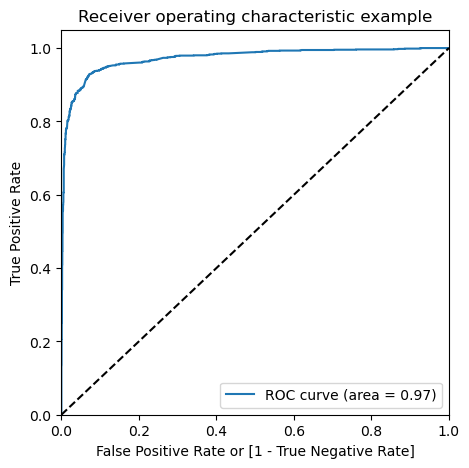

In [82]:
draw_roc(y_train_pred_final.Conversion, y_train_pred_final.Conversion_Prob)

# Step 10: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [83]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Conversion  Conversion_Prob  Lead Number  predicted  0.0  0.1  0.2  0.3  \
0           0         0.041299         7873          0    1    0    0    0   
1           0         0.090698         1980          0    1    0    0    0   
2           1         0.346512         8208          0    1    1    1    1   
3           1         0.995333         7486          1    1    1    1    1   
4           1         0.532888         2147          1    1    1    1    1   

   0.4  0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0    0  
1    0    0    0    0    0    0  
2    0    0    0    0    0    0  
3    1    1    1    1    1    1  
4    1    1    0    0    0    0

In [84]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Conversion, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380139  1.000000  0.000000
0.1   0.1  0.846265  0.963442  0.774404
0.2   0.2  0.911118  0.946687  0.889304
0.3   0.3  0.924435  0.931455  0.920131
0.4   0.4  0.925304  0.891851  0.945820
0.5   0.5  0.929647  0.872810  0.964503
0.6   0.6  0.927041  0.850724  0.973844
0.7   0.7  0.922119  0.832445  0.977113
0.8   0.8  0.914302  0.804265  0.981784
0.9   0.9  0.892009  0.731150  0.990659


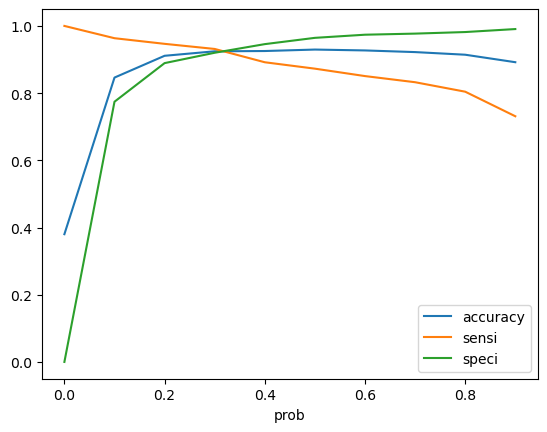

In [85]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [88]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

Conversion  Conversion_Prob  Lead Number  predicted  0.0  0.1  0.2  0.3  \
0           0         0.041299         7873          0    1    0    0    0   
1           0         0.090698         1980          0    1    0    0    0   
2           1         0.346512         8208          0    1    1    1    1   
3           1         0.995333         7486          1    1    1    1    1   
4           1         0.532888         2147          1    1    1    1    1   

   0.4  0.5  0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0    0    0                0  
1    0    0    0    0    0    0                0  
2    0    0    0    0    0    0                1  
3    1    1    1    1    1    1                1  
4    1    1    0    0    0    0                1

In [89]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Conversion, y_train_pred_final.final_predicted)

0.9244354371742907

In [90]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Conversion, y_train_pred_final.final_predicted )
confusion2

array([[1970,  171],
       [  90, 1223]])

In [91]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [92]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9314546839299315

In [93]:
# Let us calculate specificity
TN / float(TN+FP)

0.9201307800093415

In [94]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.07986921999065857


In [95]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8773314203730272


In [96]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9563106796116505


# Precision and Recall

In [97]:
#let check the confusion matrix again

In [98]:
confusion = metrics.confusion_matrix(y_train_pred_final.Conversion, y_train_pred_final.predicted )
confusion

array([[2065,   76],
       [ 167, 1146]])

Precision

TP / TP + FP

In [99]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9378068739770867

Recall

TP / TP + FN

In [101]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8728103579588729

Using sklearn utilities for the same

In [102]:
from sklearn.metrics import precision_score, recall_score

In [103]:
?precision_score

In [105]:
precision_score(y_train_pred_final.Conversion, y_train_pred_final.predicted)

0.9378068739770867

In [107]:
recall_score(y_train_pred_final.Conversion, y_train_pred_final.predicted)

0.8728103579588729

# Precision and recall tradeoff¶

In [108]:
from sklearn.metrics import precision_recall_curve

In [109]:
y_train_pred_final.Conversion, y_train_pred_final.predicted

(0       0
 1       0
 2       1
 3       1
 4       1
        ..
 3449    0
 3450    1
 3451    0
 3452    1
 3453    1
 Name: Conversion, Length: 3454, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 3449    0
 3450    1
 3451    0
 3452    1
 3453    1
 Name: predicted, Length: 3454, dtype: int64)

In [111]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Conversion, y_train_pred_final.Conversion_Prob)

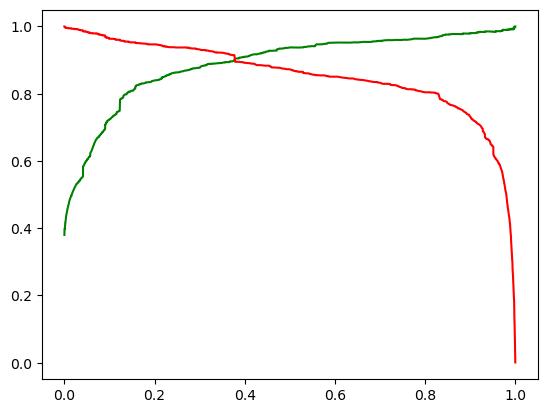

In [112]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

Step 11: Making predictions on the test set

In [114]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [118]:
X_test = X_test[col].astype(float)
X_test.head()

Do Not Email  Total Time Spent on Website  Lead Source_Direct Traffic  \
1457           0.0                    -0.886051                         0.0   
7591           0.0                    -0.777193                         0.0   
2467           0.0                    -0.886051                         0.0   
7898           0.0                    -0.837065                         1.0   
259            0.0                    -0.777193                         0.0   

      Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  \
1457                 0.0                     1.0                         0.0   
7591                 1.0                     0.0                         0.0   
2467                 0.0                     1.0                         0.0   
7898                 0.0                     0.0                         0.0   
259                  0.0                     0.0                         0.0   

      Lead Source_Referral Sites  Lead Source_Welingak Website  \
1457                         0.0                           0.0   
7591                         0.0                           0.0   
2467                         0.0                           0.0   
7898                         0.0                           0.0   
259                          1.0                           0.0   

      Lead Source_blog  Last Activity_Converted to Lead  ...  \
1457               0.0                              0.0  ...   
7591               0.0                              0.0  ...   
2467               0.0                              0.0  ...   
7898               0.0                              0.0  ...   
259                0.0                              0.0  ...   

      Tags_switched off  Tags_wrong number given  \
1457                0.0                      0.0   
7591                0.0                      0.0   
2467                0.0                      0.0   
7898                0.0                      0.0   
259                 0.0                      0.0   

      Lead Profile_Lateral Student  Lead Profile_Other Leads  \
1457                           0.0                       0.0   
7591                           0.0                       0.0   
2467                           0.0                       0.0   
7898                           0.0                       1.0   
259                            0.0                       0.0   

      Lead Profile_Potential Lead  Lead Profile_Student of SomeSchool  \
1457                          0.0                                 0.0   
7591                          0.0                                 0.0   
2467                          0.0                                 0.0   
7898                          0.0                                 0.0   
259                           0.0                                 0.0   

      Last Notable Activity_Email Bounced  \
1457                                  0.0   
7591                                  0.0   
2467                                  0.0   
7898                                  0.0   
259                                   0.0   

      Last Notable Activity_Had a Phone Conversation  \
1457                                             0.0   
7591                                             0.0   
2467                                             0.0   
7898                                             0.0   
259                                              0.0   

      Last Notable Activity_Modified  Last Notable Activity_SMS Sent  
1457                             1.0                             0.0  
7591                             0.0                             1.0  
2467                             1.0                             0.0  
7898                             0.0                             0.0  
259                              0.0                             0.0  

[5 rows x 54 columns]

In [119]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [120]:
y_test_pred = res.predict(X_test_sm)

In [165]:
y_test_pred[:20]

1457    1.532827e-02
7591    5.847612e-02
2467    3.005896e-01
7898    6.406024e-03
259     7.701039e-03
1218    1.753068e-01
7359    7.038478e-13
9218    6.036565e-03
9223    4.046839e-12
8217    1.277558e-02
1769    3.635780e-01
7901    1.796701e-01
1260    1.226875e-01
1677    1.200493e-03
8182    5.246920e-04
8996    1.261335e-01
8378    1.096115e-12
2541    9.704822e-01
8284    9.671848e-01
2533    9.976727e-01
dtype: float64

In [166]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [167]:
# Let's see the head
y_pred_1.head()

0
1457  0.015328
7591  0.058476
2467  0.300590
7898  0.006406
259   0.007701

In [168]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [169]:
# Putting CustID to index
y_test_df['Lead Number'] = y_test_df.index

In [170]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [171]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [172]:
y_pred_final.head()

Converted  Lead Number         0
0          0         1457  0.015328
1          0         7591  0.058476
2          1         2467  0.300590
3          0         7898  0.006406
4          0          259  0.007701

In [173]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [174]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Conversion','Conversion_Prob','Lead Number'], axis=1)

In [175]:
# Let's see the head of y_pred_final
y_pred_final.head()

Conversion  Conversion_Prob  Lead Number
0         NaN         0.015328         1457
1         NaN         0.058476         7591
2         NaN         0.300590         2467
3         NaN         0.006406         7898
4         NaN         0.007701          259

In [182]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.4 else 0)

In [177]:
y_pred_final.head()

Conversion  Conversion_Prob  Lead Number  final_predicted
0         NaN         0.015328         1457                0
1         NaN         0.058476         7591                0
2         NaN         0.300590         2467                1
3         NaN         0.006406         7898                0
4         NaN         0.007701          259                0

In [178]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Conversion_Prob, y_pred_final.final_predicted)

ValueError: Classification metrics can't handle a mix of continuous and binary targets

In [181]:
confusion2 = metrics.confusion_matrix(y_pred_final.Conversion, y_pred_final.final_predicted )
confusion2

ValueError: Input y_true contains NaN.

In [183]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [184]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9314546839299315

In [185]:
# Let us calculate specificity
TN / float(TN+FP)

0.9201307800093415